# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [45]:
from sklearn.datasets import load_svmlight_file
import numpy as np
X, y = load_svmlight_file('breast-cancer.csv')
X = X.toarray()
X = np.array(X)
y = np.array(y)

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [46]:
y[np.where(y==2)] = -1
y[np.where(y==4)] = 1
print(y)

[-1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1

In [47]:
for i in range(X.shape[1]):
#     print(X[:,i])
    X[:,i] = ( X[:,i] - min(X[:,i]) ) / ( max(X[:,i]) - min(X[:,i]) )
    
print(X)

[[0.06994635 0.44444444 0.         ... 0.22222222 0.         0.        ]
 [0.07016441 0.44444444 0.33333333 ... 0.22222222 0.11111111 0.        ]
 [0.07109638 0.22222222 0.         ... 0.22222222 0.         0.        ]
 ...
 [0.06164188 0.44444444 1.         ... 0.77777778 1.         0.11111111]
 [0.06228791 0.33333333 0.77777778 ... 1.         0.55555556 0.        ]
 [0.06228791 0.33333333 0.77777778 ... 1.         0.33333333 0.        ]]


### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'column X [:,2]')

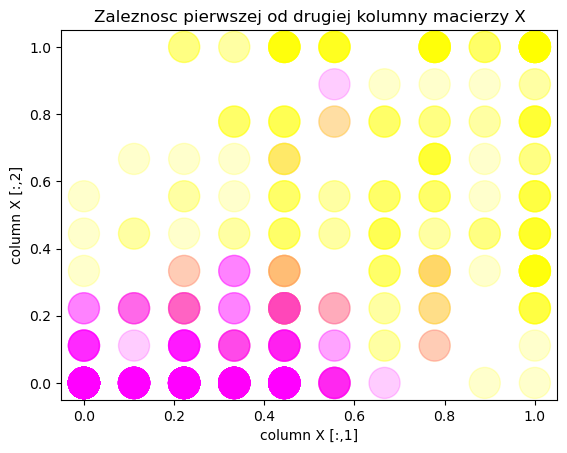

In [49]:
plt.scatter(X[:,1],X[:,2], c = y, cmap = 'spring', alpha = 0.2, s =500)

plt.title("Zaleznosc pierwszej od drugiej kolumny macierzy X")
plt.xlabel("column X [:,1]")
plt.ylabel("column X [:,2]")

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [50]:
beta = (np.linalg.inv(X.T@X)@X.T )@y

print(beta)
# A = np.array([[1,0],[0,1]])
# B = np.array([[2,0],[0,2]])
# print(np.linalg.inv(A@B))

[-6.99534089 -0.18099245  0.98590886  0.42019705  0.10457698 -0.59830206
  0.85739125 -0.31840576  0.47729336  0.16637872]


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

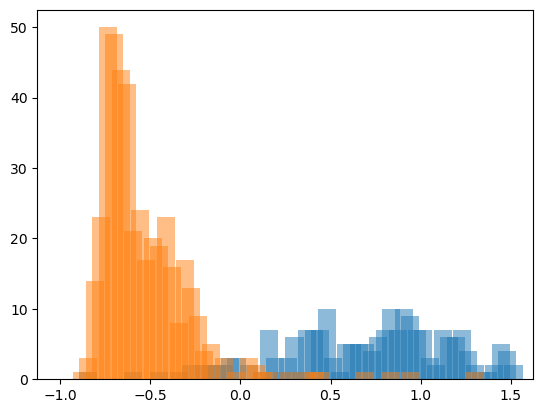

In [51]:
# plt.hist(np.random.normal(0, 1,500))

# plt.hist(beta)

# X[y==1]@beta

plt.hist(X[y==1] @ beta, alpha = 0.5, width = 0.1,range=[-1, 1.5], bins = 70)
plt.hist(X[y==-1] @ beta, alpha = 0.5, width = 0.1, range=[-1, 1.5], bins = 70)

# print(X @beta )

plt.show()



### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [52]:
klasyfikator = np.sign(X @ beta) 
print(klasyfikator)
print(y)



[-1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.
  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [53]:
wynik = (klasyfikator == y ). astype(int)
print(sum(wynik) / y.size)


0.9487554904831625


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [54]:
c = 5
beta2 = (np.linalg.inv(X.T@X + 1/c * np.identity((X.T@X).shape[0]))@X.T )@y


In [55]:
def klasyfikuj(X,y , c=1):
    beta = (np.linalg.inv(X.T@X + 1/c * np.identity((X.T@X).shape[0]))@X.T )@y

    klasyfikator = np.sign(X @ beta)
    
    wynik = (klasyfikator == y ). astype(int)
    print( "EVAL: " , sum(wynik) / y.size,"c = ",c)


for i in [-5,-1,-0.5, -0.1, -0.01,-0.0001,0.1,0.5,1,2,5,10,100]:
    klasyfikuj(X,y, i)

EVAL:  0.9487554904831625 c =  -5
EVAL:  0.9546120058565154 c =  -1
EVAL:  0.9033674963396779 c =  -0.5
EVAL:  0.8199121522693997 c =  -0.1
EVAL:  0.34699853587115664 c =  -0.01
EVAL:  0.6442166910688141 c =  -0.0001
EVAL:  0.9355783308931186 c =  0.1
EVAL:  0.9458272327964861 c =  0.5
EVAL:  0.9502196193265008 c =  1
EVAL:  0.9487554904831625 c =  2
EVAL:  0.9502196193265008 c =  5
EVAL:  0.9487554904831625 c =  10
EVAL:  0.9487554904831625 c =  100


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

In [99]:
import pandas as pd
df = pd.read_csv ('data.csv').dropna()
# print(df.head())

A = np.array(df.values.tolist() )
X = A[:,:3]
y = A[:,3]

aver = sum(y)/y.size

# y = np.where()
y[np.where(y<aver)] = -1
y[np.where(y>=aver)] = 1

print(y)

for i in range(X.shape[1]):
#     print(X[:,i])
    X[:,i] = ( X[:,i] - min(X[:,i]) ) / ( max(X[:,i]) - min(X[:,i]) )
# X


[ 1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.
  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


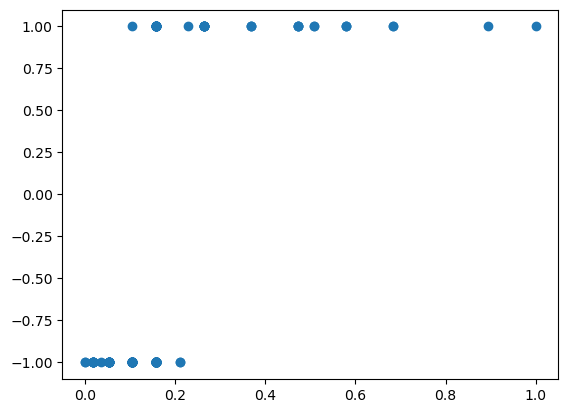

In [100]:
plt.scatter(X[:,0],y)

In [103]:
for i in [-5,-1,-0.5, -0.1, -0.01,-0.0001,0.1,0.5,1,2,5,10,100]:
    klasyfikuj(X,y, i)

EVAL:  0.8170731707317073 c =  -5
EVAL:  0.8109756097560976 c =  -1
EVAL:  0.725609756097561 c =  -0.5
EVAL:  0.7012195121951219 c =  -0.1
EVAL:  0.2926829268292683 c =  -0.01
EVAL:  0.2926829268292683 c =  -0.0001
EVAL:  0.7621951219512195 c =  0.1
EVAL:  0.823170731707317 c =  0.5
EVAL:  0.823170731707317 c =  1
EVAL:  0.8292682926829268 c =  2
EVAL:  0.8292682926829268 c =  5
EVAL:  0.8170731707317073 c =  10
EVAL:  0.8170731707317073 c =  100


### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [222]:
class LRClassifier:
    def __init__(self, C,scale = True):
        self.C = C
        self.scale = scale
    
    def fit(self, X,y):
        
        X = np.array(X)
        y = np.array(y)
        y_m = np.zeros(y.shape)
        
        if self.scale:
            for i in range(X.shape[1]):
                if min(X[:,i]) <  max(X[:,i]):
                    X[:,i] = ( X[:,i] - min(X[:,i]) ) / ( max(X[:,i]) - min(X[:,i]) )

        y_m[np.where(y==y[0])]=1
        y_m[np.where(y!=y[0])]=-1

        
        self.beta = (np.linalg.inv(X.T@X + 1/self.C * np.identity((X.T@X).shape[0]))@X.T )@y_m
        
        
    def predict(self,X):
        if self.scale :
            for i in range(X.shape[1]):
                if min(X[:,i]) <  max(X[:,i]):
                    X[:,i] = ( X[:,i] - min(X[:,i]) ) / ( max(X[:,i]) - min(X[:,i]) )
                
        klasyfikator = np.sign(X @ self.beta) 
        return klasyfikator
 

In [223]:
clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]], dtype = np.float32)
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X)) # ['x', 'x', 'y']


[ 1. -1. -1.]
